# CORPUS ANALYSIS
## Assignment 9 October 2019

For this assignment we’ll work with the Bach Chorale 
corpus for music21.  J.S. Bach’s chorales are probably 
the most (over-)analyzed repertory of primarily 
harmonic music in western music; so many small moments 
have been looked at very closely.  

But as a larger repertory there is still much to be done!  
And the chorales come packaged with `music21`, so you’ll 
have them already.

## Introduction to Parsing and Formats

To begin, create a new file in a text editor in a folder you know
how to get to from the terminal called 
`analysis1.py` – if you don’t have a pure text editor, 
I recommend either PyCharm (for 
editing Python: https://www.jetbrains.com/pycharm/
 -- free for students and faculty) or even simpler, Atom 
 (https://atom.io/).  Microsoft Word will not work.
 
In that file type the following lines:

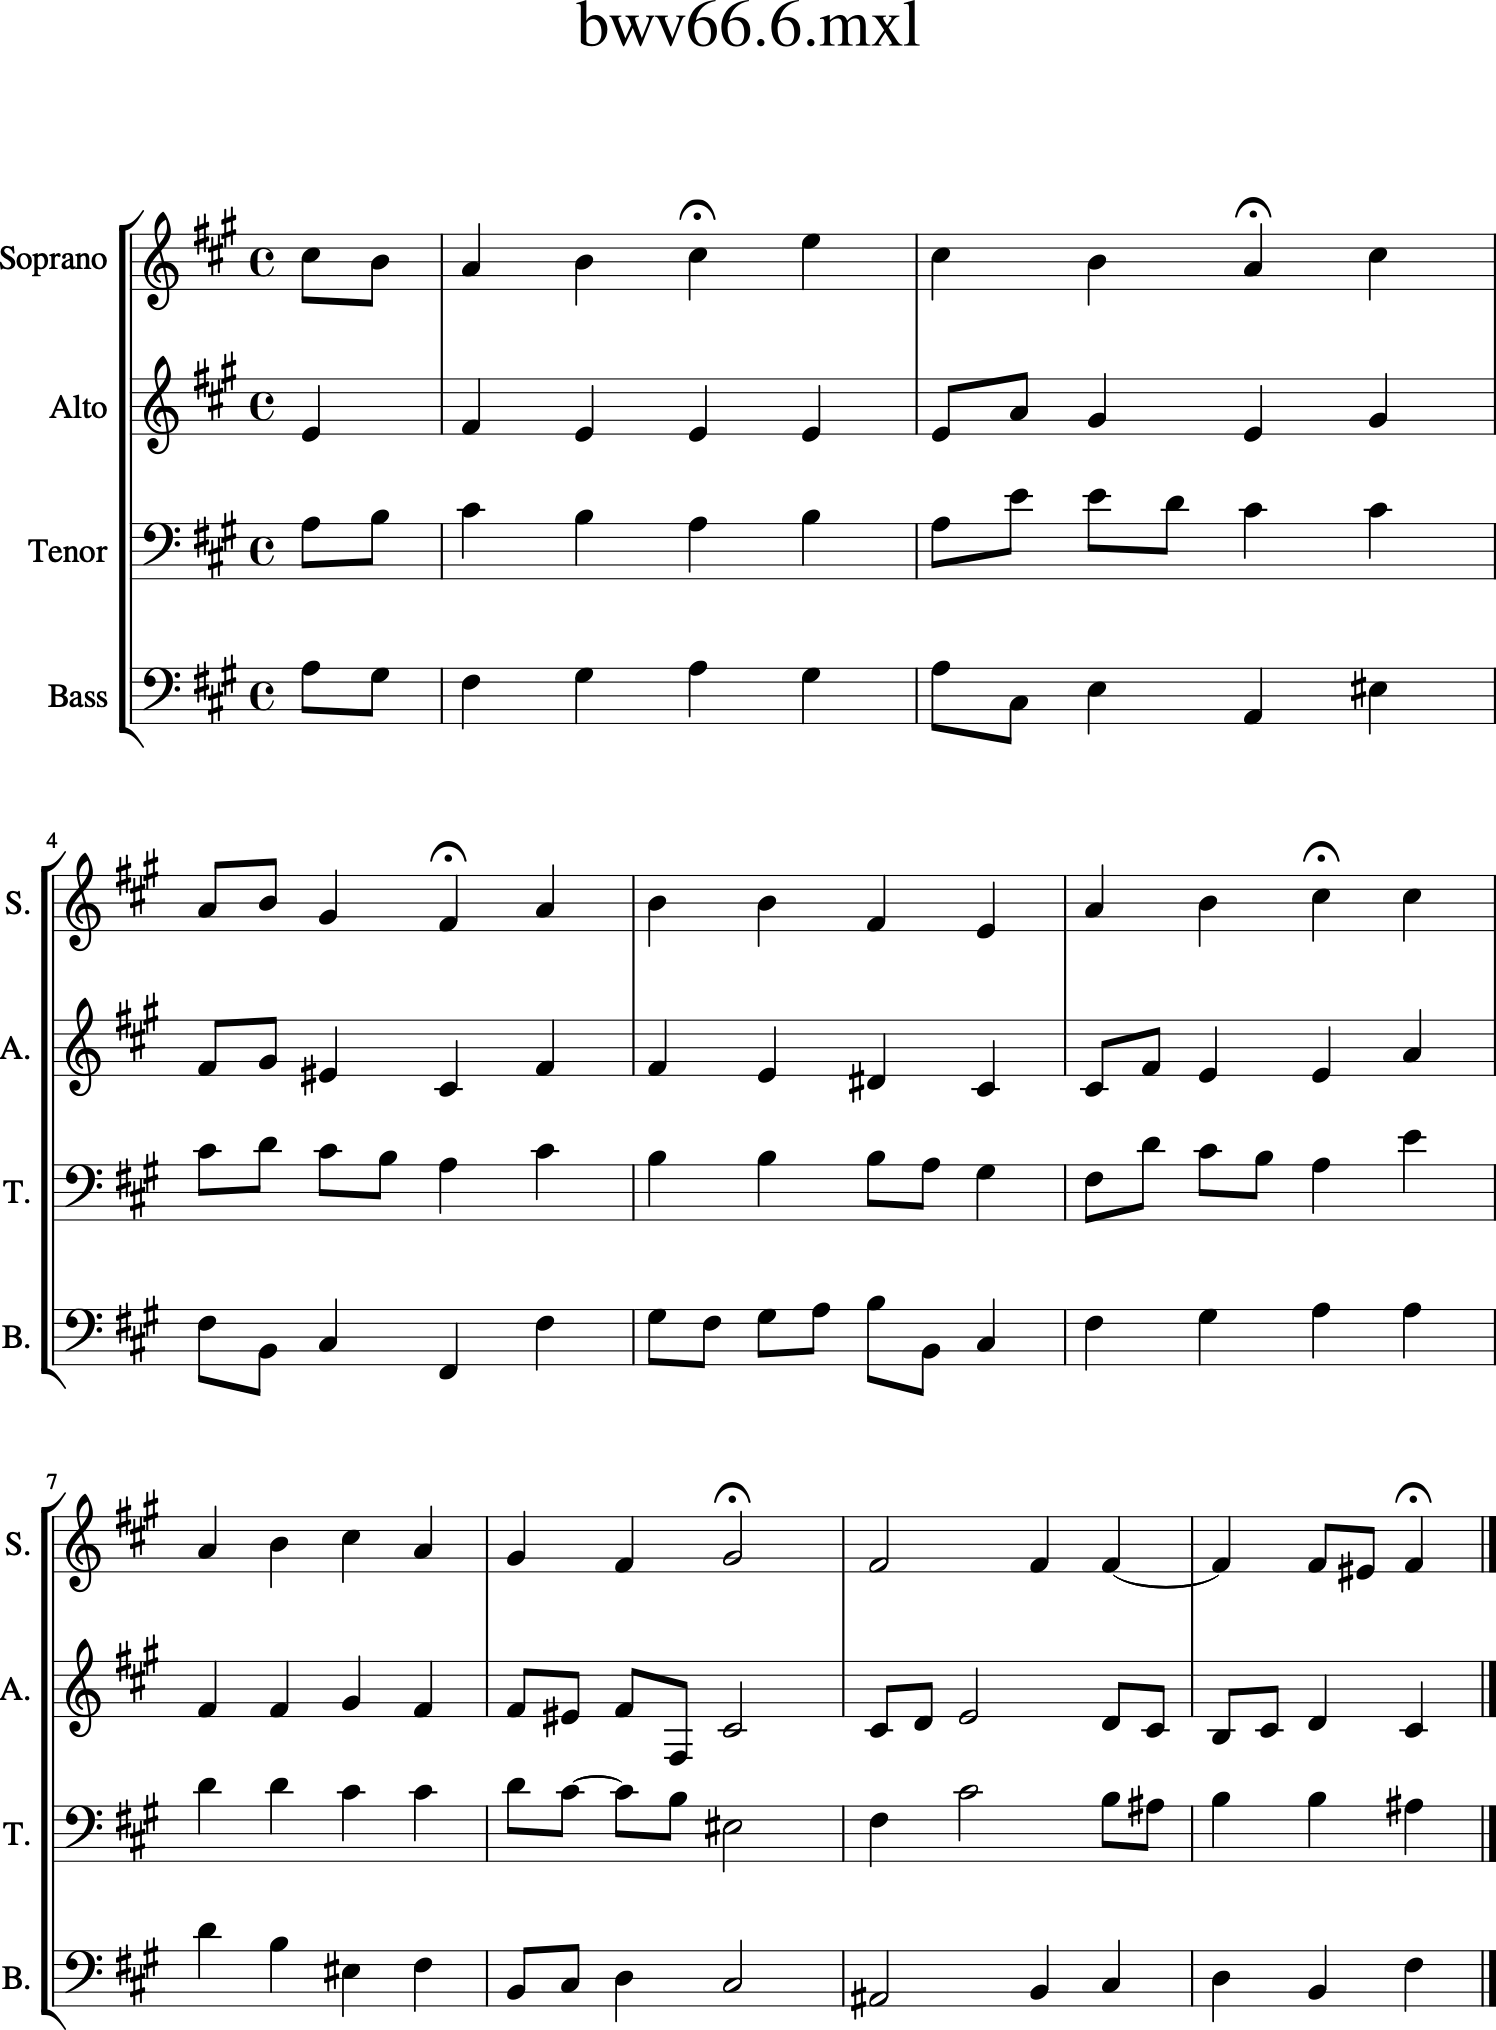

In [1]:
from music21 import *
bach = corpus.parse('bach/bwv66.6')
bach.show()

Then run the file and you should see the score as above
if you have installed MuseScore or have Finale or
Sibelius installed.  

The file that we have loaded is from Bach's cantata
BWV 66 and it's the last movement.  `corpus` means that
we are loading the file from `music21's` built in corpus
of pieces that comes with.

Now delete the line that says `bach.show()` and 
add these lines to the end of the file instead. 
Save, and run it again:

In [2]:
for thing in bach:
    print(thing)

<music21.stream.Part Soprano>
<music21.stream.Part Alto>
<music21.stream.Part Tenor>
<music21.stream.Part Bass>
<music21.layout.StaffGroup <music21.stream.Part Soprano><music21.stream.Part Alto><music21.stream.Part Tenor><music21.stream.Part Bass>>


What we can see from the output is that there are only
six things "inside" the file of this chorale: a piece
of Metadata, four parts (SATB), and something called
a StaffGroup (which just puts the pretty curly brackets
at the beginning of the score).

It probably seems really crazy that there are only six
things inside the Bach score.  Where are all the notes?
The measures? The fermatas? etc.  

It turns out that each of these musical elements are
inside another musical element.  For instance, if we
wanted to get the Soprano part, we can type:


In [3]:
soprano = bach.parts['Soprano']
for thing in soprano:
    print(thing)

P1: Soprano: Instrument 1
<music21.stream.Measure 0 offset=0.0>
<music21.stream.Measure 1 offset=1.0>
<music21.stream.Measure 2 offset=5.0>
<music21.stream.Measure 3 offset=9.0>
<music21.stream.Measure 4 offset=13.0>
<music21.stream.Measure 5 offset=17.0>
<music21.stream.Measure 6 offset=21.0>
<music21.stream.Measure 7 offset=25.0>
<music21.stream.Measure 8 offset=29.0>
<music21.stream.Measure 9 offset=33.0>


Now it's looking a little more like musical structure!

(Note: if that didn't work, double check that you
put quotes around the second `'Soprano'` and that you capitalized
the "S" the in the second "Soprano" but not the first.  Also
check that you've used square `[brackets]` and not `(parentheses)`.)

We could have also gotten the Soprano by realizing that it's the
first part, and thus part 0 (because Python calls the first thing
`0`, the second thing `1`, etc.  


In [4]:
soprano = bach.parts[0]
for thing in soprano:
    print(thing)

P1: Soprano: Instrument 1
<music21.stream.Measure 0 offset=0.0>
<music21.stream.Measure 1 offset=1.0>
<music21.stream.Measure 2 offset=5.0>
<music21.stream.Measure 3 offset=9.0>
<music21.stream.Measure 4 offset=13.0>
<music21.stream.Measure 5 offset=17.0>
<music21.stream.Measure 6 offset=21.0>
<music21.stream.Measure 7 offset=25.0>
<music21.stream.Measure 8 offset=29.0>
<music21.stream.Measure 9 offset=33.0>


(If this is brand new to you,
look at [An introduction to Python Lists](https://www.w3schools.com/python/python_lists.asp), or
if it's just a bit vague, consult
[Music21 User's Guide, Chapter 4](https://web.mit.edu/music21/doc/usersGuide/usersGuide_04_stream1.html))

Now we can see that measure 1 is the third thing in Soprano (the first thing
is an Instrument object; the second thing is Measure 0 (the pickup measure)).

So we can do add this to our code to get measure 1:

In [5]:
measure1 = soprano[2]
for thing in measure1:
    print(thing)

<music21.note.Note A>
<music21.note.Note B>
<music21.note.Note C#>
<music21.note.Note E>


(type these lines, save, and run the program again; we'll
do this after each time I add some code...)

And now we've finally gotten to the notes in the piece.
Scroll back up and confirm that the first full measure
of the soprano begins "A B C# E".

Note that we can also get any measure by calling `.measure()`
on a Part object, like the Soprano part.  Note that here
we are putting parentheses after `.measure` not square brackets,
and we will call measures by their proper measure numbers:

In [6]:
measure1 = soprano.measure(1)
for thing in measure1:
    print(thing)

<music21.note.Note A>
<music21.note.Note B>
<music21.note.Note C#>
<music21.note.Note E>


And we can get the first note of measure 1 by
saying `measure1[0]` -- again, the first
thing inside something else in Python is called
element 0:

In [7]:
note1 = measure1[0]
print(note1)

<music21.note.Note A>


Notice that I didn't put `for thing in note1:` because
I happen to know that notes don't have things inside them:

In [8]:
for thing in note1:
    print(thing)

TypeError: 'Note' object is not iterable

If you're adding this code line-by-line, you'll want to delete
the `for thing in note1:` and `print(thing)` lines, since otherwise
nothing will run after that.  (Every time I purposely create
an error, go ahead and delete the lines after you
get the error yourself).

Okay, so what can we do with `note1` once we have it?
I've written the best explanation in 
[User's Guide chapters 2](https://web.mit.edu/music21/doc/usersGuide/usersGuide_02_notes.html)
and [3](https://web.mit.edu/music21/doc/usersGuide/usersGuide_03_pitches.html),
but here are some ideas what you might do:

In [9]:
print(note1.pitch.octave)

4


In [10]:
print(note1.duration)

<music21.duration.Duration 1.0>


In [11]:
print(note1.duration.type)

quarter


and so on, and so forth.

WHO CARES, RIGHT?

I mean, this is all things that you would know just by looking at the score -- you don't need a computer to do this for you.

So what we want to do is look at *a lot* of notes really fast and see if anything happens with it.

To do that, we'll need a way of getting at everything in the piece really fast.  For that we'll go back to the highest level of the piece, which we simply called `bach` and use a new "method" called `.recurse()` which will burrow down into each part, and each measure in each part, until we get at the lowest level.

Go ahead and type this, but your output will probably scroll off the screen:

In [12]:
for thing in bach.recurse():
    print(thing)

<music21.stream.Part Soprano>
P1: Soprano: Instrument 1
<music21.stream.Measure 0 offset=0.0>
<music21.clef.TrebleClef>
f# minor
<music21.meter.TimeSignature 4/4>
<music21.note.Note C#>
<music21.note.Note B>
<music21.stream.Measure 1 offset=1.0>
<music21.note.Note A>
<music21.note.Note B>
<music21.note.Note C#>
<music21.note.Note E>
<music21.stream.Measure 2 offset=5.0>
<music21.note.Note C#>
<music21.note.Note B>
<music21.note.Note A>
<music21.note.Note C#>
<music21.stream.Measure 3 offset=9.0>
<music21.layout.SystemLayout>
<music21.note.Note A>
<music21.note.Note B>
<music21.note.Note G#>
<music21.note.Note F#>
<music21.note.Note A>
<music21.stream.Measure 4 offset=13.0>
<music21.note.Note B>
<music21.note.Note B>
<music21.note.Note F#>
<music21.note.Note E>
<music21.stream.Measure 5 offset=17.0>
<music21.note.Note A>
<music21.note.Note B>
<music21.note.Note C#>
<music21.note.Note C#>
<music21.stream.Measure 6 offset=21.0>
<music21.layout.SystemLayout>
<music21.note.Note A>
<music21.

Now we can see that we're getting everything -- TimeSignatures, Notes, Measures, etc.  But let's just isolate the notes alone by adding `.notes` after `.recurse()`.  We'll also change `thing` to `n` as a variable representing a note:

In [13]:
for n in bach.recurse().notes:
    print(n)

<music21.note.Note C#>
<music21.note.Note B>
<music21.note.Note A>
<music21.note.Note B>
<music21.note.Note C#>
<music21.note.Note E>
<music21.note.Note C#>
<music21.note.Note B>
<music21.note.Note A>
<music21.note.Note C#>
<music21.note.Note A>
<music21.note.Note B>
<music21.note.Note G#>
<music21.note.Note F#>
<music21.note.Note A>
<music21.note.Note B>
<music21.note.Note B>
<music21.note.Note F#>
<music21.note.Note E>
<music21.note.Note A>
<music21.note.Note B>
<music21.note.Note C#>
<music21.note.Note C#>
<music21.note.Note A>
<music21.note.Note B>
<music21.note.Note C#>
<music21.note.Note A>
<music21.note.Note G#>
<music21.note.Note F#>
<music21.note.Note G#>
<music21.note.Note F#>
<music21.note.Note F#>
<music21.note.Note F#>
<music21.note.Note F#>
<music21.note.Note F#>
<music21.note.Note E#>
<music21.note.Note F#>
<music21.note.Note E>
<music21.note.Note F#>
<music21.note.Note E>
<music21.note.Note E>
<music21.note.Note E>
<music21.note.Note E>
<music21.note.Note A>
<music21.no

Now we're getting closer to Corpus analysis.  Let's try something.  The piece is in f# minor (or maybe A major? we can fight it out in Columbus).  Let's assume f# minor.  So let's test the theory that the dominant note (C#) is more common than the tonic (F#) in most tonal pieces.  We'll set up two counters: `num_fsharp` and `num_csharp` (note that we cannot use `#` in a variable name; I often use the German `num_fis` and `num_cis` in my own work for that reason).

In [15]:
num_fsharp = 0
num_csharp = 0

Now we can run through every note and see how many times its name is `F#` and how many times its name is `C#` and add one to each counter when it is:

In [16]:
for n in bach.recurse().notes:
    if n.pitch.name == 'F#':
        num_fsharp += 1
    if n.pitch.name == 'C#':
        num_csharp += 1

and then we can print the number of F-sharps:

In [17]:
print(num_fsharp)

30


and of course do the same for the number of C-sharps

## Question 1

In BWV 66, movement 6, are there more F-sharps or C-sharps?

## Question 2

For each of the following other chorales: `bwv10.7`, `bwv255`, or `bwv366`: rerun the same analysis, but determine the key for each piece.  Over four chorales does it look like the tonic happens more often than the dominant? or vice-versa? or would you need to keep investigating?


## Comparing pitch height

We can also look at `n.pitch.midi` as a crude numeric representation of the pitch height of each note:

In [25]:
for n in measure1.notes:
    print(n.pitch.midi, n)

69 <music21.note.Note A>
71 <music21.note.Note B>
73 <music21.note.Note C#>
76 <music21.note.Note E>


Here is a passage of four ascending notes.  We can keep a crude track of whether any note ascends or descends by keeping a record of the last note's midi number and comparing it to the next one:

In [27]:
lastNoteMidi = 69
numAscending = 0
numDescending = 0

for n in soprano.recurse().notes:
    if n.pitch.midi > lastNoteMidi:
        numAscending += 1
    if n.pitch.midi < lastNoteMidi:
        numDescending += 1
    lastNoteMidi = n.pitch.midi
    

In [28]:
print(numAscending)

15


In [29]:
print(numDescending)

16


Here everything is very balanced. Of course we just looked at the soprano part.  Are basses different?  They seem to leap up and then float down.  Or maybe that's just my perception?

## Question 3

For each of the four chorales, find the bass part (`.parts[3]`) and determine if on aggregate ascents are more common than descents.

## Bonus Question (4)

We can get the beat number of any note with `n.beat`:

In [30]:
for n in measure1.notes:
    print(n.beat)

1.0
2.0
3.0
4.0


Do notes on beat 1 tend to ascend from the last note?  Do notes on beat 4 behave differently?

**Bonus-bonus** question: can you create an ascent, descent profile for every beat position, including offbeats like 1.5?

Contact me or the list with any questions!  -- Myke (cuthbert@mit.edu)
